# Final Assignment for Practical Programming PA 7081: 50 marks in total. Solve 3 problems only.

Due January 12th 2026 at 12:00. 

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
    <p><b>IMPORTANT!</b>  </p>
    <p> Everyone solves Problems 1 and 2. For Problem 3, however, students solve either 3A -- those with UoL email ending with an EVEN NUMBER, or 3B -- ODD email user name ending, see below.  For problem 1, the `rev26_27.dat' file has already been given to you in the ``Data_files_for_workshop" folder on Blackboard.   </p>
</div>

<div class="alert alert-warning" style="width: 60%; margin-left: 20%; margin-top:20px">
    <p><b>IMPORTANT!</b>  </p>
    <p>     
    Submit your solution as your Jupyter Notebook without any file compression. Use your email user name for the file name, e.g., name it ``ab131.ipynb" if your UoL email user name is ``ab131".
 
</div>

## Problem 1  (20 marks): Reading, plotting, and analysing data from a file.


Read in the contents of the file 'rev26_27.dat' into a RecArray.  This is a data file containing results from a spacecraft called Cassini: the magnetometer measurements from two orbits around Saturn in 2007. The columns are day-of-year since 2004, and three field components in spherical polar coordinates ($B_r$, $B_\theta$, $B_\varphi$). Make the following plot:
 
* Plot $B_r$ versus day of year since 2004 with cyan dots.
* Limit the time (date) axis to between 935 to 955 days, and the $y$ axis to between -3.5 to 6.5
* Label the axes appropriately and add a title and a legend.  
* Add a dotted green horizontal line at $B_r=0$.  
* Plot a quadratic regression (line of best fit with a polynomial of second order) in blue, and print the coefficients of the fit.
* Introduce an array of days from 935 to 955 (e.g., 935, 936, ... 954). For each of the days, calculate the daily mean of $B_r$ and also its daily maximum. Call these arrays `Brmean` and `Brmax`, respectively.  Use array slicing and Boolean True/False to select the data for this.
* Plot `Brmean` and `Brmax` versus day of the year on the same panel as the data above with red crosses and a blue dosh-dat line, respectively, labelling the data appropriately.
* Calculate the mean of `Brmax` and print it to the third significant digit using the `format` method.




Quadratic regression coefficients: [nan nan nan]


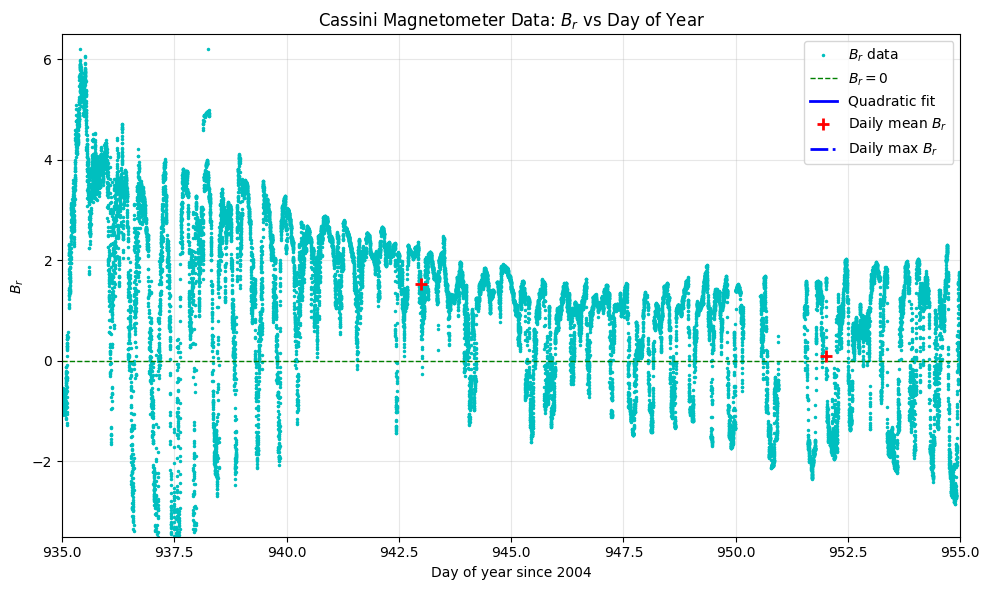

Mean of Brmax: 2.3


In [1]:
#Answer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.ion()

# Read the data file into a RecArray
data = np.genfromtxt('Data_files_for_release/rev26_27.dat', 
                     dtype=[('day', 'f8'), ('Br', 'f8'), ('Btheta', 'f8'), ('Bphi', 'f8')])
data_rec = np.rec.array(data)

# Filter data for the time range 935 to 955
mask = (data_rec.day >= 935) & (data_rec.day <= 955)
day_filtered = data_rec.day[mask]
Br_filtered = data_rec.Br[mask]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(day_filtered, Br_filtered, 'c.', label='$B_r$ data', markersize=3)
plt.xlim(935, 955)
plt.ylim(-3.5, 6.5)
plt.xlabel('Day of year since 2004')
plt.ylabel('$B_r$')
plt.title('Cassini Magnetometer Data: $B_r$ vs Day of Year')
plt.axhline(y=0, color='g', linestyle='--', linewidth=1, label='$B_r = 0$')

# Quadratic regression (polynomial of 2nd order)
coeffs = np.polyfit(day_filtered, Br_filtered, 2)
poly_fit = np.poly1d(coeffs)
day_fit = np.linspace(935, 955, 100)
Br_fit = poly_fit(day_fit)
plt.plot(day_fit, Br_fit, 'b-', label='Quadratic fit', linewidth=2)
print('Quadratic regression coefficients:', coeffs)

# Array of days from 935 to 955 (935, 936, ..., 954)
days_array = np.arange(935, 955, 1)
Brmean = np.zeros(len(days_array))
Brmax = np.zeros(len(days_array))

# Calculate daily mean and max for each day
for i, day in enumerate(days_array):
    # Use boolean indexing to select data for each day
    day_mask = (data_rec.day >= day) & (data_rec.day < day + 1)
    Br_day = data_rec.Br[day_mask]
    if len(Br_day) > 0:
        Brmean[i] = np.mean(Br_day)
        Brmax[i] = np.max(Br_day)
    else:
        Brmean[i] = np.nan
        Brmax[i] = np.nan

# Plot Brmean and Brmax
plt.plot(days_array, Brmean, 'r+', markersize=8, label='Daily mean $B_r$', markeredgewidth=2)
plt.plot(days_array, Brmax, 'b-.', linewidth=2, label='Daily max $B_r$')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and print mean of Brmax to third significant digit
mean_brmax = np.nanmean(Brmax)
print('Mean of Brmax: {:.2g}'.format(mean_brmax))


## Problem 2 (15 marks): Plot a color map and a contour plot of a function, and a histogram

Here we want to define a function $z$ of $x$ and $y$ coordinates:

$$
z = \frac{\sin A x \cos(y+r)}{B + x} 
$$

where $r = \sqrt{x^2 + y^2}$, $A$ and $B$ are constants. We then plot the function with a colour map and make a histogram giving some details about the map. In particular, please do the following:

* Introduce a Python function that does the following: (1) defines Numpy arrays x and y from $a$ to $b$ with N elements each; (2) computes the values of the function $z$ as defined above; (3) accepts $N$, $a$ and $b$ as arguments and $A$ and $B$ as keywords with default values $A=1, B=0$; (4) return arrays $x$, $y$ and the 2D Numpy array $z$. 

* Produce a figure with two panels side by side horisontally. The left hand side panel should show the colour map image and a contour plot (on the same image) of function $z$ for $A=1$, $B=1$, $N=100$, $a=0$, $b=2\pi$. The right hand panel should show the histogram of the values of $z$ for all the ($N \times N$) pixels. Make sure that you plot looks professional, e.g., has labels and the title. Test that your code works for $B$ between 0 and 2. 

* Compute and print in one line the mean of the function $z(x,y)$ on the domain defined above. Use `.format` statement and the scientific notation with 4 digits after the floating point. 




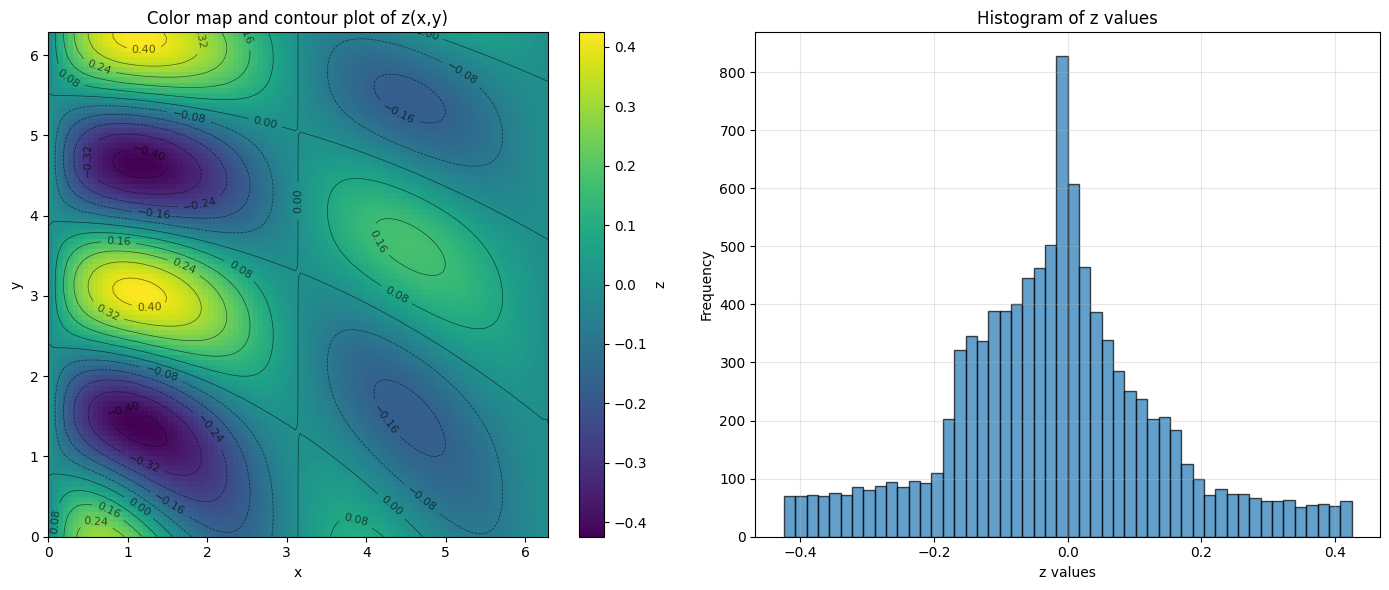

Mean of z(x,y): -1.9100e-02


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function z(x,y)
def compute_z(N, a, b, A=1, B=0):
    """
    Computes the function z = sin(A*x)*cos(y+r)/(B+x) where r = sqrt(x^2+y^2)
    
    Parameters:
    N: number of elements in x and y arrays
    a: start value for x and y arrays
    b: end value for x and y arrays
    A: constant parameter (default=1)
    B: constant parameter (default=0)
    
    Returns:
    x: 1D numpy array
    y: 1D numpy array
    z: 2D numpy array
    """
    x = np.linspace(a, b, N)
    y = np.linspace(a, b, N)
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)
    z = np.sin(A * X) * np.cos(Y + r) / (B + X)
    return x, y, z

# Compute z for the specified parameters
x, y, z = compute_z(N=100, a=0, b=2*np.pi, A=1, B=1)

# Create figure with two panels side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left panel: color map and contour plot
im = ax1.imshow(z, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', cmap='viridis', aspect='auto')
contours = ax1.contour(x, y, z, levels=10, colors='black', linewidths=0.5, alpha=0.6)
ax1.clabel(contours, inline=True, fontsize=8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Color map and contour plot of z(x,y)')
plt.colorbar(im, ax=ax1, label='z')

# Right panel: histogram
ax2.hist(z.flatten(), bins=50, edgecolor='black', alpha=0.7)
ax2.set_xlabel('z values')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of z values')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compute and print the mean of z using .format with scientific notation
z_mean = np.mean(z)
print('Mean of z(x,y): {:.4e}'.format(z_mean))


## Problem 3A -- Group A: ONLY the students with even email user name ending (e.g., sn84 or ab450).

## Use Odeint package to solve the following equation [15 marks]

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs to work through this problem.

Use `odeint` to solve the following third order ODE on a linear grid of 1000 points from $x=0$ to $x=3$:

$$\frac{d^3 y}{dx^3} + \frac{d^2 y}{dx^2} + \frac{1}{t_s}\frac{dy}{dx} -G y + \frac{3}{2} y \sin(2y)= 0$$ 

here $y(x)$ is an unknown function, $t_s$ and $G$ are constant parameters. The initial conditions at point $x=0$ are: $y(0)=0$, $dy/dx(0) = 1$, and $d^2 y/dx^2(0) = 0$.

* Solve this equation numerically using parameter values $G=1$ and $t_s = 1$. Plot functions $y(x)$ and $dy/dx$ on the same plot making it as informative and professionally looking as possible. Find the maximum value of $ y(x)$ on the plot, which we shall call $y_{max}$, and print it inside the plot window. 

* Now let us see how $y_{max}$ changes as the parameter $t_s$ changes. Create an array of 50 $t_s$ values covering the range from $t_s = 0.1$ to $t_s = 10$. For each value of $t_s$ in the array repeat the calculation above and find the corresponding value of $y_{max}$. You should now have 50 values of $t_s$ and 50 corresponding values of $y_{max}$. Plot $y_{max}$ as a function of $t_s$ in another plot window. Using the `worked example: exoplanet` in Section 08, fit the $y_{max}$ vs $t_s$ relationship with a polynomial of 5th order, and display it on the same plot. 

`Hint:` making plots logarithmic may be a good idea sometimes.

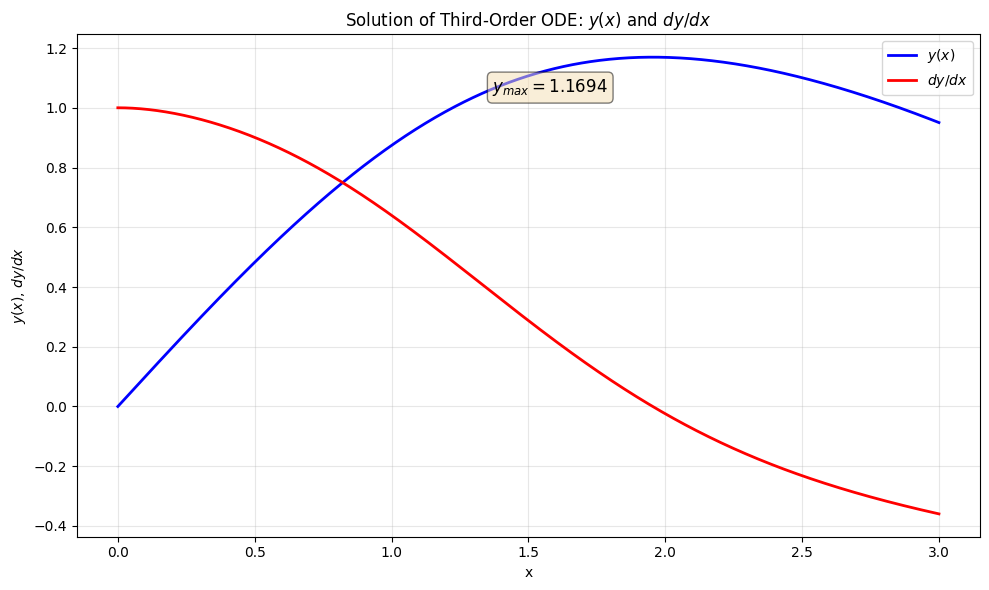

y_max = 1.169443


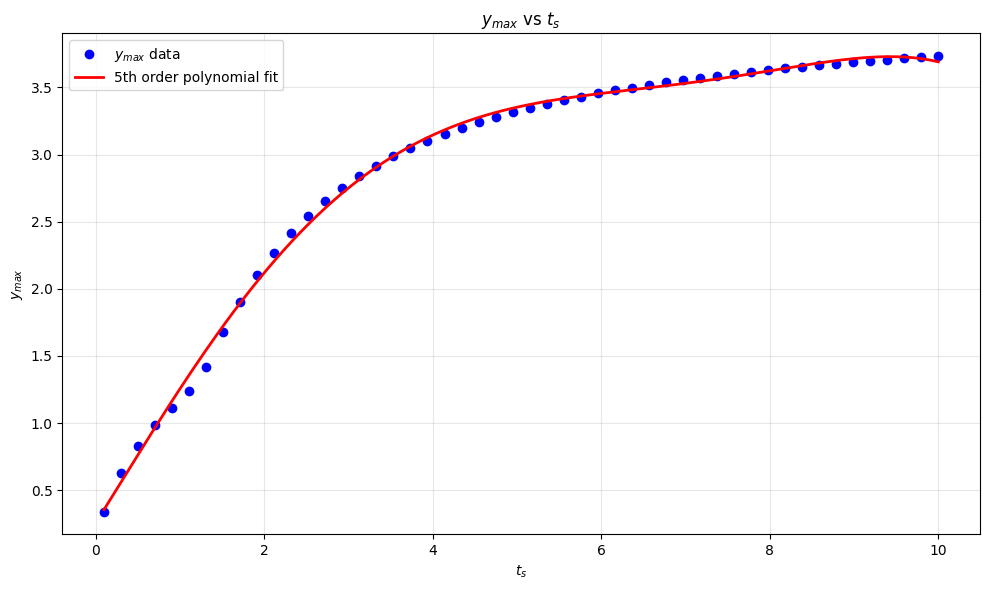

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define the system of first-order ODEs for the third-order ODE
# Let u0 = y, u1 = dy/dx, u2 = d^2y/dx^2
def dydx_system(u, x, ts, G):
    """
    System of first-order ODEs for:
    d^3y/dx^3 + d^2y/dx^2 + (1/ts)*dy/dx - G*y + (3/2)*y*sin(2y) = 0
    """
    u0, u1, u2 = u
    du0dx = u1
    du1dx = u2
    du2dx = -u2 - (1/ts)*u1 + G*u0 - (3/2)*u0*np.sin(2*u0)
    return [du0dx, du1dx, du2dx]

# Part 1: Solve with G=1, ts=1
G = 1
ts = 1
x_grid = np.linspace(0, 3, 1000)
u0_init = 0  # y(0) = 0
u1_init = 1  # dy/dx(0) = 1
u2_init = 0  # d^2y/dx^2(0) = 0
u_init = [u0_init, u1_init, u2_init]

# Solve the ODE
solution = odeint(dydx_system, u_init, x_grid, args=(ts, G))
y_sol = solution[:, 0]  # y(x)
dydx_sol = solution[:, 1]  # dy/dx

# Find maximum value of y(x)
y_max = np.max(y_sol)
y_max_idx = np.argmax(y_sol)
x_max = x_grid[y_max_idx]

# Plot y(x) and dy/dx
plt.figure(figsize=(10, 6))
plt.plot(x_grid, y_sol, 'b-', label='$y(x)$', linewidth=2)
plt.plot(x_grid, dydx_sol, 'r-', label='$dy/dx$', linewidth=2)
plt.xlabel('x')
plt.ylabel('$y(x)$, $dy/dx$')
plt.title('Solution of Third-Order ODE: $y(x)$ and $dy/dx$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.7*x_max, 0.9*y_max, f'$y_{{max}} = {y_max:.4f}$', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=12)
plt.tight_layout()
plt.show()

print(f'y_max = {y_max:.6f}')

# Part 2: Study y_max vs ts
ts_array = np.linspace(0.1, 10, 50)
y_max_array = np.zeros(len(ts_array))

for i, ts_val in enumerate(ts_array):
    solution = odeint(dydx_system, u_init, x_grid, args=(ts_val, G))
    y_sol = solution[:, 0]
    y_max_array[i] = np.max(y_sol)

# Fit with 5th order polynomial
coeffs_poly = np.polyfit(ts_array, y_max_array, 5)
poly_fit = np.poly1d(coeffs_poly)
ts_fit = np.linspace(0.1, 10, 200)
y_max_fit = poly_fit(ts_fit)

# Plot y_max vs ts
plt.figure(figsize=(10, 6))
plt.plot(ts_array, y_max_array, 'bo', markersize=6, label='$y_{max}$ data')
plt.plot(ts_fit, y_max_fit, 'r-', linewidth=2, label='5th order polynomial fit')
plt.xlabel('$t_s$')
plt.ylabel('$y_{max}$')
plt.title('$y_{max}$ vs $t_s$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Problem 3B -- Group B.  ONLY the students with odd email user name ending (e.g., sn83 or ab301).

## Use Odeint package to solve the following set of equations [15 marks]

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs to work through this problem.

Using the `odeint` method for $N=1000$ points $t_i= 0, 1, 2, ..., N-1$ spread uniformly between $0\le t_i\le 20$, solve the following equation

$$\frac{d^2 y}{dt^2} =  e^{-a t} \left[-2 a \cos t + (a^2 - 1) \sin t \right] \;\;.$$

where $a=0.5$ is a positive parameter. The initial conditions for this equation are $y(t=0) = 1$ and $dy/dt(t=0) = 1$. Note that there is an exact solution of this equation: $y_{ex}(t) = e^{-at} \sin(t)$. 

* Define the numerical integration error $\epsilon_i$ for each point $t_i$, with $i$ between $i=0$ and $i=N-1$, as

$$ \epsilon_i = \frac{|y_{ex}(t_i) - y_{num}(t_i)|}{|y_{ex}(t_i)| + |y_{num}(t_i)| + \Delta} \;,$$

where $y_{num}$ is your numerical solution of the equation, and $\Delta = 10^{-30}$ is a tiny number added to avoid possible divisions by zero. Plot $\epsilon_i$ versus $t_i$. Define the average error of the integration, $\varepsilon_N$, as the mean of your $\epsilon_i$ values. Print it.

* Solve the equation again, and calculate the average error, $\varepsilon_N$, for $N = 300, 1000, 3000, 10000, 30000, 100000, 300000$. Make a plot of $\varepsilon_N$ versus $N$. Discuss your plot:  What do your results imply about odeint integration accuracy? How can you improve the integration with odeint?

`Hint:` making plots logarithmic may be a good idea.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time
%matplotlib inline

